In [1]:
! pip install pyfpgrowth

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: syncthing-gtk v0.9.4.4-ds-git20220108-9023143f8b93 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of syncthing-gtk or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [16]:
import pandas as pd

itemset_df = pd.read_csv('data/itemset.csv')

itemset_df.head()

itemset_df

,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_has_email_verification,host_has_phone_verification,host_has_work_email_verification,host_has_photographer_verification,host_response_time_a_few_days_or_more,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour
0,100,96,True,True,True,False,False,False,False,False,False,False,True
1,100,80,True,True,True,False,False,False,False,False,False,False,True
2,100,98,True,True,True,False,False,False,False,False,False,False,True
3,90,89,False,True,True,False,False,False,False,False,False,False,True
4,100,93,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29867,82,0,False,True,True,False,False,False,False,False,True,False,False
29868,23,38,False,True,True,False,False,False,False,True,False,False,False
29869,100,91,False,True,True,False,False,False,False,False,False,False,True
29870,99,99,False,True,True,False,False,False,False,False,False,False,True


In [23]:
def equidepth_partitioning(n_bins, values):
    sorted_values = sorted(values)

    depth = len(sorted_values)//n_bins

    start_percent = 0
    end_percent = start_percent + depth - 1

    bins = []

    while end_percent < n_bins * depth - 1:
        bins.append((sorted_values[start_percent], sorted_values[end_percent]))
        
        start_percent = end_percent + 1
        end_percent = start_percent + depth - 1
    
    bins.append((sorted_values[start_percent], sorted_values[-1]))

    bins = sorted(list(set(bins)))

    for i, (start, end) in enumerate(bins[:-1]):
        next_start, next_end = bins[i+1]

        if end == next_start:
            if start == end: bins[i+1] = (next_start + 1, next_end)
            else: bins[i] = (start, end - 1)

    return bins

#Estimating bin number

response_freqs = {}
acceptance_freqs = {}

for val in itemset_df['host_response_rate']:
    response_freqs[val] = response_freqs.get(val, 0) + 1/len(itemset_df['host_response_rate'])

for val in itemset_df['host_acceptance_rate']:
    acceptance_freqs[val] = acceptance_freqs.get(val, 0) + 1/len(itemset_df['host_acceptance_rate'])

x1 = []
y1 = []

x2 = []
y2 = []

c = 0
print('Percent frequencies for response:')
for val, freq in sorted(response_freqs.items(), reverse=True, key=lambda pair:pair[1]):
    print(f'{val}:\t{round(freq*100, 2)}%')
    x1 += [f'{val}%']
    y1 += [round(freq*100, 2)]
    c += 1
    if c == 5: break

c = 0
print('\nPercent frequencies for acceptance:')
for val, freq in sorted(acceptance_freqs.items(), reverse=True, key=lambda pair:pair[1]):
    print(f'{val}:\t{round(freq*100, 2)}%')
    x2 += [f'{val}%']
    y2 += [round(freq*100, 2)]
    c += 1
    if c == 5: break

Percent frequencies for response:
100:	68.24%
90:	4.49%
99:	3.0%
0:	2.32%
80:	2.15%

Percent frequencies for acceptance:
100:	28.71%
0:	4.83%
99:	4.58%
98:	4.11%
97:	3.3%


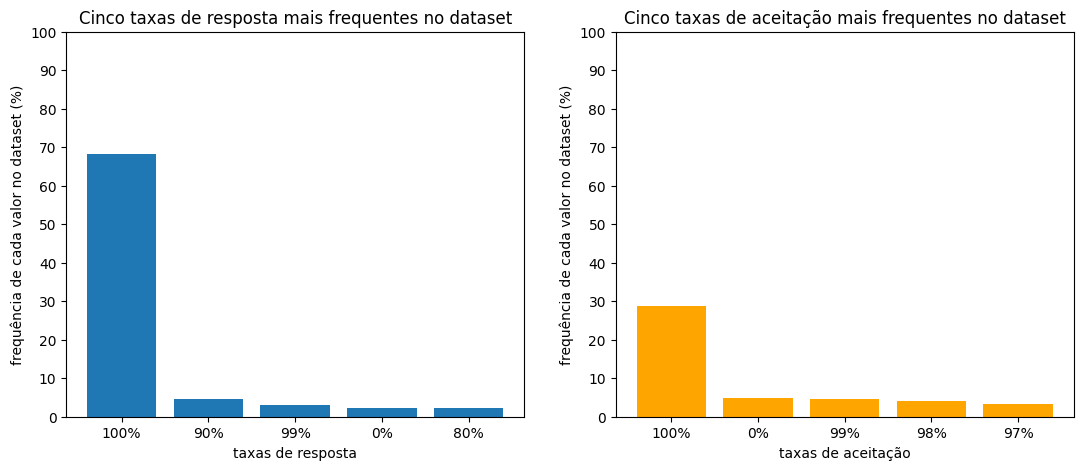

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(13,5))

axs[0].bar(x1,y1)
axs[0].set_title('Cinco taxas de resposta mais frequentes no dataset')
axs[0].set_xlabel('taxas de resposta')
axs[0].set_ylabel('frequência de cada valor no dataset (%)')
axs[0].set_yticks(list(range(0,110,10)))

axs[1].bar(x2,y2, color='orange')
axs[1].set_title('Cinco taxas de aceitação mais frequentes no dataset')
axs[1].set_xlabel('taxas de aceitação')
axs[1].set_ylabel('frequência de cada valor no dataset (%)')
axs[1].set_yticks(list(range(0,110,10)))

plt.show()

In [15]:
n_bins = 5

for start, end in equidepth_partitioning(n_bins, itemset_df['host_response_rate']):
    itemset_df[f'host_response_rate:[{start}%-{end}%]'] = itemset_df['host_response_rate'].apply(lambda val: val >= start and val <= end)

for start, end in equidepth_partitioning(n_bins, itemset_df['host_acceptance_rate']):
    itemset_df[f'host_acceptance_rate:[{start}%-{end}%]'] = itemset_df['host_acceptance_rate'].apply(lambda val: val >= start and val <= end)

itemset_df = itemset_df.drop(['host_response_rate', 'host_acceptance_rate'], axis = 1)

itemset_df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,host_has_email_verification,host_has_phone_verification,host_has_work_email_verification,host_has_photographer_verification,host_response_time_a_few_days_or_more,host_response_time_within_a_day,host_response_time_within_a_few_hours,host_response_time_within_an_hour,host_response_rate:[0%-89%],host_response_rate:[90%-99%],host_response_rate:[100%-100%],host_acceptance_rate:[0%-57%],host_acceptance_rate:[58%-83%],host_acceptance_rate:[84%-96%],host_acceptance_rate:[97%-99%],host_acceptance_rate:[100%-100%]
0,True,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False
1,True,True,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False
2,True,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False
3,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
4,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False


In [5]:
#Separating datasets for each class

superhost_itemset_df = itemset_df[itemset_df['host_is_superhost']].drop('host_is_superhost', axis = 1)
not_superhost_itemset_df = itemset_df[~itemset_df['host_is_superhost']].drop('host_is_superhost', axis = 1)

In [6]:
#Mount transactions

def get_transaction(row):
    transaction = []
    
    for label, flag in row.items():
        if flag: transaction.append(label)
    
    return transaction

superhost_transactions = list(superhost_itemset_df.apply(get_transaction, axis = 1))
not_superhost_transactions = list(not_superhost_itemset_df.apply(get_transaction, axis = 1))

In [7]:
import pyfpgrowth as fp_growth

support_threshold = 0.7

superhost_patterns = fp_growth.find_frequent_patterns(superhost_transactions, len(superhost_transactions) * support_threshold)
not_superhost_patterns = fp_growth.find_frequent_patterns(not_superhost_transactions, len(not_superhost_transactions) * support_threshold)

In [8]:
unique_superhost_patterns = {itemset: support for itemset, support in superhost_patterns.items() if itemset not in not_superhost_patterns}
unique_not_superhost_patterns = {itemset: support for itemset, support in not_superhost_patterns.items() if itemset not in superhost_patterns}

common_patterns = {itemset for itemset in not_superhost_patterns if itemset in superhost_patterns}
common_patterns.union({itemset for itemset in superhost_patterns if itemset in not_superhost_patterns})

print(f'Unique superhost patterns: {len(unique_superhost_patterns)}')
print(f'Unique not superhost patterns: {len(unique_not_superhost_patterns)}')
print(f'Common patterns: {len(common_patterns)}')

Unique superhost patterns: 9
Unique not superhost patterns: 1
Common patterns: 2


In [9]:
print('Unique Superhost Itemsets')
for itemset, support in sorted(unique_superhost_patterns.items(), reverse = True, key=lambda pair:pair[1]):
    print(f'{round(100*support/len(superhost_transactions), 2)}% - {itemset}')

print('\nCommon Itemsets')
for itemset in common_patterns:
    superhost_support = round(100*superhost_patterns[itemset]/len(superhost_transactions), 2)
    not_superhost_support = round(100*not_superhost_patterns[itemset]/len(not_superhost_transactions), 2)

    print(f'Superhost: {superhost_support}%/Not Superhost: {not_superhost_support}% - {itemset}')

print('\nUnique Not Superhost Itemsets')
for itemset, support in sorted(unique_not_superhost_patterns.items(), reverse = True, key=lambda pair:pair[1]):
    print(f'{round(100*support/len(not_superhost_transactions), 2)}% - {itemset}')

Unique Superhost Itemsets
89.5% - ('host_response_rate:[100%-100%]',)
89.05% - ('host_has_profile_pic', 'host_response_rate:[100%-100%]')
80.95% - ('host_has_profile_pic', 'host_response_time_within_an_hour')
79.5% - ('host_identity_verified', 'host_response_rate:[100%-100%]')
79.26% - ('host_has_profile_pic', 'host_identity_verified', 'host_response_rate:[100%-100%]')
76.12% - ('host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')
75.74% - ('host_has_profile_pic', 'host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')
72.99% - ('host_identity_verified', 'host_response_time_within_an_hour')
72.71% - ('host_has_profile_pic', 'host_identity_verified', 'host_response_time_within_an_hour')

Common Itemsets
Superhost: 88.57%/Not Superhost: 81.72% - ('host_has_profile_pic', 'host_identity_verified')
Superhost: 99.39%/Not Superhost: 97.07% - ('host_has_profile_pic',)

Unique Not Superhost Itemsets
84.0% - ('host_identity_verified',)


In [10]:
support_threshold = 0.4

superhost_patterns = fp_growth.find_frequent_patterns(superhost_transactions, len(superhost_transactions) * support_threshold)
not_superhost_patterns = fp_growth.find_frequent_patterns(not_superhost_transactions, len(not_superhost_transactions) * support_threshold)

In [11]:
unique_superhost_patterns = {itemset: support for itemset, support in superhost_patterns.items() if itemset not in not_superhost_patterns}
unique_not_superhost_patterns = {itemset: support for itemset, support in not_superhost_patterns.items() if itemset not in superhost_patterns}

common_patterns = {itemset for itemset in not_superhost_patterns if itemset in superhost_patterns}
common_patterns.union({itemset for itemset in superhost_patterns if itemset in not_superhost_patterns})

print(f'Unique superhost patterns: {len(unique_superhost_patterns)}')
print(f'Unique not superhost patterns: {len(unique_not_superhost_patterns)}')
print(f'Common patterns: {len(common_patterns)}')

Unique superhost patterns: 4
Unique not superhost patterns: 2
Common patterns: 8


In [12]:
print('Unique Superhost Itemsets')
for itemset, support in sorted(unique_superhost_patterns.items(), reverse = True, key=lambda pair:pair[1]):
    print(f'{round(100*support/len(superhost_transactions), 2)}% - {itemset}')

print('\nCommon Itemsets')
for itemset in common_patterns:
    superhost_support = round(100*superhost_patterns[itemset]/len(superhost_transactions), 2)
    not_superhost_support = round(100*not_superhost_patterns[itemset]/len(not_superhost_transactions), 2)

    print(f'Superhost: {superhost_support}%/Not Superhost: {not_superhost_support}% - {itemset}')

print('\nUnique Not Superhost Itemsets')
for itemset, support in sorted(unique_not_superhost_patterns.items(), reverse = True, key=lambda pair:pair[1]):
    print(f'{round(100*support/len(not_superhost_transactions), 2)}% - {itemset}')

Unique Superhost Itemsets
89.5% - ('host_response_rate:[100%-100%]',)
75.74% - ('host_has_profile_pic', 'host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')
68.31% - ('host_identity_verified', 'host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')
68.08% - ('host_has_profile_pic', 'host_identity_verified', 'host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')

Common Itemsets
Superhost: 88.57%/Not Superhost: 81.72% - ('host_has_profile_pic', 'host_identity_verified')
Superhost: 89.05%/Not Superhost: 56.71% - ('host_has_profile_pic', 'host_response_rate:[100%-100%]')
Superhost: 99.39%/Not Superhost: 97.07% - ('host_has_profile_pic',)
Superhost: 72.71%/Not Superhost: 44.45% - ('host_has_profile_pic', 'host_identity_verified', 'host_response_time_within_an_hour')
Superhost: 76.12%/Not Superhost: 40.23% - ('host_response_rate:[100%-100%]', 'host_response_time_within_an_hour')
Superhost: 80.95%/Not Superhost: 50.61% - ('host_has_profile_pic